In [1]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Data_Cleaning import 
Income_Dataset = pd.read_csv("Datasets/Dataset_update_remove_dups")

# Create a data frame
Income_Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,5.397605e-79
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.000000e+00


In [3]:
# Drop extra columns
#Income_Dataset = Income_Dataset.drop(columns=['Number of Rx Meds', 'Minutes of Moderate Work Daily','Age at Screening','Race','Educational Attainment'
#                                             ,'Minutes of Vigorous Work Daily','Minutes of Moderate Recreation Daily',])
#Income_Dataset

In [4]:
Income_Dataset.describe()
Income_Dataset.info()
print(Income_Dataset.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         15560 non-null  float64
 1   Number of Rx Meds                     6844 non-null   float64
 2   Gender                                15560 non-null  float64
 3   Age at Screening                      15560 non-null  float64
 4   Race                                  15560 non-null  float64
 5   Educational Attainment                9232 non-null   float64
 6   Family Income to Poverty Ratio        13359 non-null  float64
 7   Minutes of Vigorous Work Daily        2402 non-null   float64
 8   Minutes of Moderate Work Daily        4164 non-null   float64
 9   Minutes of Vigorous Recreation Daily  2417 non-null   float64
 10  Minutes of Moderate Recreation Daily  3893 non-null   float64
 11  Minutes of Sede

In [5]:
#Income Dictionary
Income_Dic = {}


In [6]:
Income_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         15560 non-null  float64
 1   Number of Rx Meds                     6844 non-null   float64
 2   Gender                                15560 non-null  float64
 3   Age at Screening                      15560 non-null  float64
 4   Race                                  15560 non-null  float64
 5   Educational Attainment                9232 non-null   float64
 6   Family Income to Poverty Ratio        13359 non-null  float64
 7   Minutes of Vigorous Work Daily        2402 non-null   float64
 8   Minutes of Moderate Work Daily        4164 non-null   float64
 9   Minutes of Vigorous Recreation Daily  2417 non-null   float64
 10  Minutes of Moderate Recreation Daily  3893 non-null   float64
 11  Minutes of Sede

In [7]:
# Create an empty dictionary
Income_dic = {}

# Define the range of numbers
start = 1
end = 4.99

# Convert the end variable to an integer
end = int(end)

# Create the dictionary with keys as numbers in the range and values as 1
for num in range(start, end+1):
    Income_dic[num] = 1


Income_Dataset["Family Income to Poverty Ratio"] = pd.cut(Income_Dataset["Family Income to Poverty Ratio"],bins=[0,5,6],labels=["< $20,000", ">= $20,000"],right=False)
# Print the dictionary
Income_dic = {5:"≥ $20,000",1: "< $20,000", 2: '< $20,000', 3: '< $20,000', 4: '< $20,000'}



Income_Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,">= $20,000",NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,5.397605e-79
4,109267.0,1.0,2.0,21.0,2.0,4.0,">= $20,000",NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.000000e+00


In [8]:
#Gender Dictionary 
Gender_dic = {1.0 : "Male",2.0:"Female"}


Income_Dataset["Gender"] = Income_Dataset["Gender"].map(Gender_dic)
Income_Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,Male,2.0,6.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,Female,13.0,1.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,Male,2.0,3.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,Female,29.0,6.0,5.0,">= $20,000",NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,5.397605e-79
4,109267.0,1.0,Female,21.0,2.0,4.0,">= $20,000",NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.000000e+00


In [9]:
Income_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Respondent ID                         15560 non-null  float64 
 1   Number of Rx Meds                     6844 non-null   float64 
 2   Gender                                15560 non-null  object  
 3   Age at Screening                      15560 non-null  float64 
 4   Race                                  15560 non-null  float64 
 5   Educational Attainment                9232 non-null   float64 
 6   Family Income to Poverty Ratio        13359 non-null  category
 7   Minutes of Vigorous Work Daily        2402 non-null   float64 
 8   Minutes of Moderate Work Daily        4164 non-null   float64 
 9   Minutes of Vigorous Recreation Daily  2417 non-null   float64 
 10  Minutes of Moderate Recreation Daily  3893 non-null   float64 
 11  Mi

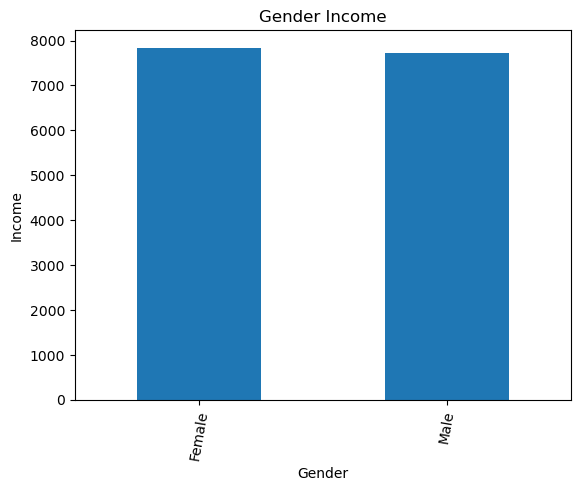

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Filter the DataFrame down only to those columns to chart
Gender_bar = Income_Dataset['Gender'].value_counts()

# Create a Pandas bar plot based off of the group series from before and label the title
# Use DataFrame.plot() in order to create a bar chart of the data
Gender_bar.plot(kind="bar")

# Set a title for the chart
plt.title("Gender Income")
plt.xlabel("Gender")
plt.xticks(rotation=80)
plt.ylabel("Income") 

plt.show()

In [13]:
Income_Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,Male,2.0,6.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,Female,13.0,1.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,Male,2.0,3.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,Female,29.0,6.0,5.0,">= $20,000",NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,5.397605e-79
4,109267.0,1.0,Female,21.0,2.0,4.0,">= $20,000",NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.000000e+00


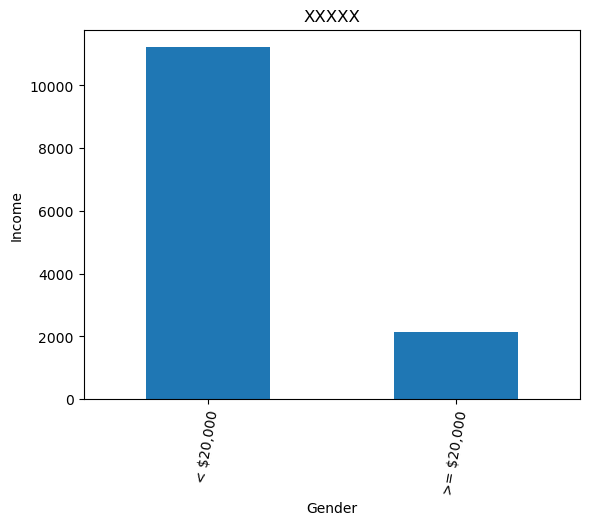

In [15]:
# Filter the DataFrame down only to those columns to chart
Sleep_barWD = Income_Dataset['Sleep Hours Week/Workdays'].value_counts()
Income_bar = Income_Dataset['Family Income to Poverty Ratio'].value_counts()


# Create a Pandas bar plot based off of the group series from before and label the title
# Use DataFrame.plot() in order to create a bar chart of the data
Income_bar.plot(kind="bar")

# Set a title for the chart
plt.title("XXXXX")
plt.xlabel("Gender")
plt.xticks(rotation=80)
plt.ylabel("Income") 

plt.show()

In [ ]:
Sleep_barWD


In [ ]:
Income_bar